In [9]:
## Dataset
# Using the California Housing Dataset available in scikit-learn.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X, y = housing.data, housing.target

feature_names = housing.feature_names
print("Feature names:", feature_names)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
## Data Preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
## Implement Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 0.75


In [12]:
## Feature Importance

coefficients = model.coef_
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f}")

MedInc: 0.854
HouseAge: 0.123
AveRooms: -0.294
AveBedrms: 0.339
Population: -0.002
AveOccup: -0.041
Latitude: -0.897
Longitude: -0.870


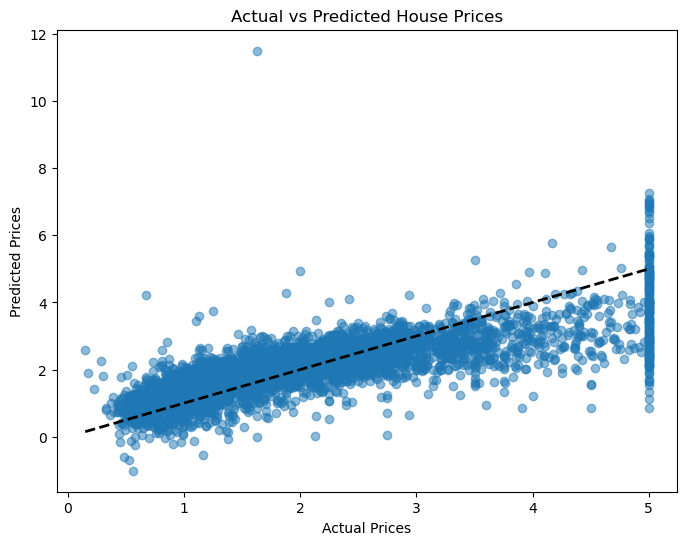

In [13]:
## Visualize Actual vs Predicted Prices

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()